In [1]:
import numpy as np
import pandas as pd
import skimage
print(skimage.__version__)

0.13.1


In [2]:
!ls

datalab


# Misc info

In [0]:
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/'
num_classes = 120
num_channels = 3

# Sub-features

In [0]:
#Create folders
import os
def folder_create(path):
    os.makedirs(os.path.join(path), exist_ok=True)

In [0]:
#Dowload files
from six.moves.urllib.request import urlretrieve
def downloadfile(filename, targetloc='.', url=url):
    dest_filename = os.path.join(targetloc, filename)
    filename, _ = urlretrieve(url + filename, dest_filename)
    print(dest_filename, 'created')
    return filename

In [0]:
#Extract files
import tarfile
import sys
def extract(filename, target, location = '.'):
    
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(target)
    tar.close()
    print(filename, 'created')

# dataset preparation

## Folder creation

In [0]:
# Folder creation
folder_create('lists')
folder_create('train')
folder_create('test')
folder_create('features')
folder_create('Annotation')

## downloading

In [8]:
#Datadownloading
downloadfile('lists.tar')
downloadfile('annotation.tar')
downloadfile('images.tar')
#downloadfile('train_data.mat', targetloc = 'features')
#downloadfile('test_data.mat', targetloc = 'features')

./lists.tar created
./annotation.tar created
./images.tar created


'./images.tar'

## Data preparation

In [9]:
#File extraction
extract('lists.tar', target='lists/')
extract('annotation.tar', target='.')
extract('images.tar', target='.')

lists.tar created
annotation.tar created
images.tar created


In [10]:
!ls

Annotation	datalab   Images      lists	 test
annotation.tar	features  images.tar  lists.tar  train


In [11]:
import scipy.io as sio
test_list = sio.loadmat('lists/test_list.mat')
train_list = sio.loadmat('lists/train_list.mat')
test_list.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [0]:
from bs4 import BeautifulSoup
from skimage.io import imread, imsave
from skimage import transform

def spreadfiles(listmat, serie=None, annotation='Annotation', images='Images'):
    counter = 0
    for filepath in listmat['file_list']:
        counter +=1
        if counter % 500 == 0:
            print(f'{counter} files done')
        cleanedfilepath = filepath[0][0]
        filename = os.path.split(cleanedfilepath)[-1].split('.')[0]
        foldername = os.path.split(cleanedfilepath)[0]
        details = {}
        with open(os.path.join(annotation, foldername, filename), 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'html.parser')
            dog = soup.find('object')
            details['xmin'] = int(dog.xmin.string)
            details['xmax'] = int(dog.xmax.string)
            details['ymin'] = int(dog.ymin.string)
            details['ymax'] = int(dog.ymax.string)
            #details['breed'] = dog.find_all('name')[0].string
        #print(os.path.join(images, foldername, f'{filename}.jpg'))
        image_data = imread(os.path.join(images, foldername, f'{filename}.jpg'))
        new_image_data = image_data[details['ymin']:details['ymax'],details['xmin']:details['xmax'],:]
        newpath = os.path.join(serie, foldername)
        #print(newpath)
        folder_create(newpath)
        try:
            imsave(os.path.join(newpath, f'{filename}.jpg'), new_image_data)
        except:
            print(f'problem with {filename} :-(')


In [13]:
%%time
spreadfiles(test_list, serie='test')



500 files done
1000 files done
1500 files done
2000 files done
2500 files done
3000 files done
3500 files done
4000 files done
4500 files done
5000 files done
5500 files done
6000 files done
6500 files done
7000 files done
7500 files done
8000 files done
8500 files done
CPU times: user 1min 42s, sys: 1.37 s, total: 1min 44s
Wall time: 1min 44s


In [14]:
%%time
spreadfiles(train_list, serie='train')

500 files done
1000 files done
1500 files done
2000 files done
2500 files done
3000 files done
3500 files done
4000 files done
4500 files done
5000 files done
5500 files done
6000 files done
6500 files done
7000 files done
7500 files done
8000 files done
8500 files done
9000 files done
9500 files done
10000 files done
10500 files done
11000 files done
11500 files done
12000 files done
CPU times: user 2min 24s, sys: 1.9 s, total: 2min 26s
Wall time: 2min 27s


# FastAI and pytorch

## General install

In [15]:
# FastAI install
!pip install fastai
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

    100% |████████████████████████████████| 430kB 2.5MB/s 
    100% |████████████████████████████████| 1.3MB 1.1MB/s 
    100% |████████████████████████████████| 1.5MB 986kB/s 
    100% |████████████████████████████████| 112kB 9.2MB/s 
    100% |████████████████████████████████| 174kB 5.5MB/s 
    100% |████████████████████████████████| 20.9MB 71kB/s 


    100% |████████████████████████████████| 3.4MB 427kB/s 
    100% |████████████████████████████████| 112kB 9.4MB/s 
    100% |████████████████████████████████| 51kB 5.7MB/s 
    100% |████████████████████████████████| 51kB 11.7MB/s 
    100% |████████████████████████████████| 2.2MB 550kB/s 


    100% |████████████████████████████████| 61kB 10.3MB/s 
    100% |████████████████████████████████| 4.2MB 342kB/s 
    100% |████████████████████████████████| 552kB 2.7MB/s 
    100% |████████████████████████████████| 13.7MB 112kB/s 
    100% |████████████████████████████████| 92kB 10.7MB/s 
    100% |████████████████████████████████| 471kB 2.4MB/s 
    100% |████████████████████████████████| 5.7MB 249kB/s 
    100% |████████████████████████████████| 860kB 1.5MB/s 
    100% |████████████████████████████████| 81kB 6.8MB/s 


    100% |████████████████████████████████| 71kB 11.1MB/s 
    100% |████████████████████████████████| 102kB 7.6MB/s 
    100% |████████████████████████████████| 61kB 8.2MB/s 
    100% |████████████████████████████████| 81kB 10.9MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/2b/88/fe4cfe5bfa9cfea91cdfd2fe205f88746bf103f7b2994dffba
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ |

 / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc995

Get:7 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [74.3 kB]
Get:8 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [40.3 kB]
Get:9 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [136 kB]
Get:10 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [323 kB]
Fetched 1,036 kB in 1s (650 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
13 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
    33% |██████████▉                     | 199.6MB 51.7MB/s eta 0:00:08

    100% |████████████████████████████████| 592.3MB 32.4MB/s 
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 61kB 3.2MB/s 
    100% |████████████████████████████████| 2.0MB 683kB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Model

In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
torch.cuda.set_device(0)

In [0]:
PATH = ''
sz = 224
arch = resnet50
bs = 58

In [0]:
#data augmentatiom
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
# dataset cration
data = ImageClassifierData.from_paths(PATH, trn_name='train', val_name='test', tfms=tfms, bs=bs)

In [5]:
fn = PATH + data.trn_ds.fnames[1]; fn

'train/n02085620-Chihuahua/n02085620_2614.jpg'

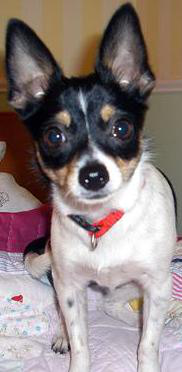

In [6]:
img = PIL.Image.open(fn); img

In [0]:
#def get_data(sz, bs): # sz: image size, bs: batch size
#    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#    data = ImageClassifierData.from_paths(PATH, trn_name='train', val_name='test', tfms=tfms, bs=bs, )
    
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
#    return data if sz > 300 else data.resize(340, 'tmp')

In [8]:
# Precompute data
#data = get_data(sz, bs)

In [127]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 148/148 [01:15<00:00,  1.95it/s]


In [128]:
lrf = learn.lr_find()
lrf

 90%|████████▉ | 186/207 [00:07<00:00, 26.15it/s, loss=10.4]


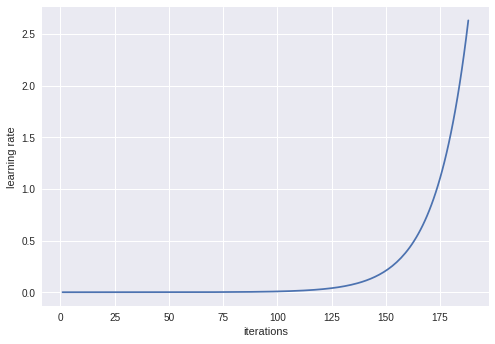

In [129]:
learn.sched.plot_lr()

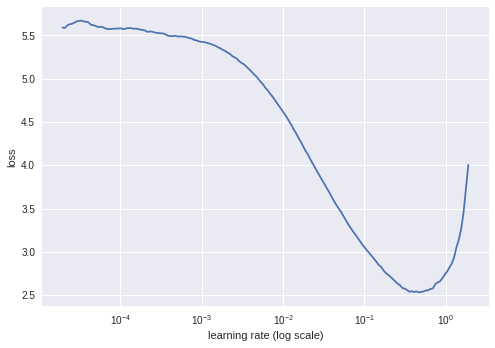

In [130]:
learn.sched.plot()

In [131]:
learn.fit(1e-1, 5)

[0.      1.00684 0.63892 0.81231]
[1.      0.71757 0.56997 0.82546]
[2.      0.55225 0.57534 0.83606]
 63%|██████▎   | 130/207 [00:04<00:02, 27.93it/s, loss=0.478]

[3.      0.47614 0.55409 0.84377]
[4.      0.44229 0.55301 0.84656]



## Data augmentation

In [77]:
data = get_data(sz, bs)

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [79]:
lrf = learn.lr_find()


 10%|█         | 21/207 [00:01<00:11, 15.73it/s, loss=5.47]


 20%|█▉        | 41/207 [00:02<00:10, 15.64it/s, loss=5.45]


 30%|███       | 63/207 [00:03<00:08, 16.32it/s, loss=5.4] 


 39%|███▊      | 80/207 [00:04<00:07, 16.51it/s, loss=5.21]


 55%|█████▌    | 114/207 [00:05<00:04, 21.97it/s, loss=4.38]


 68%|██████▊   | 141/207 [00:05<00:02, 25.49it/s, loss=3.1] 


 81%|████████  | 168/207 [00:05<00:01, 28.62it/s, loss=2.88]


 90%|████████▉ | 186/207 [00:06<00:00, 30.68it/s, loss=12.9]

                                                            

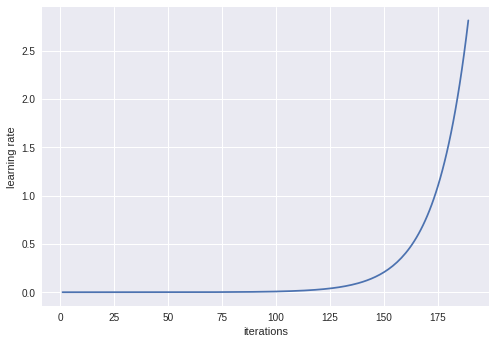

In [80]:
learn.sched.plot_lr()

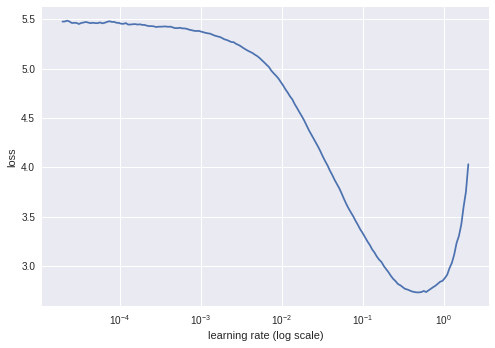

In [81]:
learn.sched.plot()

In [82]:
learn.fit(1e-2, 2)


 10%|█         | 21/207 [00:01<00:11, 16.43it/s, loss=4.66]


 20%|█▉        | 41/207 [00:02<00:10, 16.28it/s, loss=3.6] 


 30%|███       | 63/207 [00:03<00:08, 16.92it/s, loss=2.89]


 39%|███▉      | 81/207 [00:04<00:07, 16.77it/s, loss=2.32]


 66%|██████▌   | 137/207 [00:05<00:02, 25.51it/s, loss=1.65]

[0.      1.20878 0.64256 0.83677]
[1.      0.73794 0.52398 0.84994]



In [0]:
learn.precompute = False

In [21]:
learn.fit(1e-2, 5, cycle_len=1)

[0.      0.751   0.48208 0.85774]
[1.      0.68973 0.47437 0.85611]
 67%|██████▋   | 138/207 [01:17<00:38,  1.77it/s, loss=0.658]

[2.      0.69257 0.4667  0.85646]
[3.      0.64521 0.45743 0.8603 ]
 98%|█████████▊| 203/207 [01:50<00:02,  1.84it/s, loss=0.622]

[4.      0.62424 0.45178 0.86007]



## Increase size

In [37]:
# Starting training on small images for a few epochs, then switching to bigger images, and continuing training is an amazingly effective way to avoid overfitting.

# http://forums.fast.ai/t/planet-classification-challenge/7824/96
# set_data doesn’t change the model at all. It just gives it new data to train with.
learn.set_data(get_data(299, bs)) 
learn.freeze()

https://becominghuman.ai/3-lines-of-code-deciphering-fast-ai-658e79151af8

In [38]:
learn.fit(1e-1, 3, cycle_len=1)

[0.      0.91697 0.51708 0.84165]
[1.      0.8107  0.4905  0.84866]
 67%|██████▋   | 139/207 [01:17<00:37,  1.79it/s, loss=0.777]

[2.      0.72769 0.47946 0.84924]



In [39]:
# When you are under fitting, it means cycle_len=1 is too short (learning rate is getting reset before it had the chance to zoom in properly).
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2) # 1+2+4 = 7 epochs

[0.      0.59932 0.46476 0.85342]
[1.      0.58632 0.45122 0.85797]
 67%|██████▋   | 138/207 [01:17<00:38,  1.79it/s, loss=0.551]

[2.      0.5687  0.44737 0.85914]
[3.      0.56001 0.4481  0.85623]
 98%|█████████▊| 203/207 [01:49<00:02,  1.85it/s, loss=0.532]

[4.      0.5397  0.44237 0.85984]
[5.      0.5221  0.4394  0.86007]
[6.      0.52238 0.43752 0.86159]



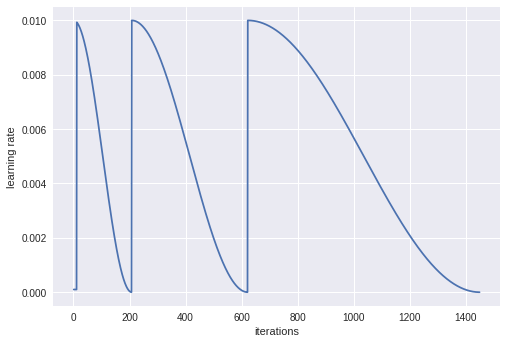

In [40]:
learn.sched.plot_lr()

## Single picture prediction

In [0]:
preds = np.argmax(learn.predict(), axis=1)

In [133]:
# Accuracy measurement
from sklearn.metrics import accuracy_score
accuracy_score(data.val_y, preds)

0.8447552447552448

In [153]:
fn = data.val_ds.fnames[3]
img = open_image(fn)
#data.val_ds.fnames
#data.val_y.shape
#dir(data.val_ds.get)

img[None].shape
im = tfms[0](img)
print(im[None].shape)
#learn.predict_array(img[None])

(1, 3, 224, 224)


In [0]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)
im = val_tfms(open_image(fn))
#type(im[None])
learn.precompute = False

preds = learn.predict_array(im[None])

In [161]:
preds

array([[ -0.0177 , -12.1672 ,  -5.77734, -11.19813, -11.19142,  -9.63881, -10.5947 ,  -7.6468 , -15.50553,
        -14.81105, -14.77317,  -7.08685, -16.11213, -13.82802, -13.00547, -13.78302, -12.64841, -15.26416,
        -12.07078, -14.71197,  -6.75717, -12.71002, -13.4233 , -15.72697, -15.01722, -13.83628, -11.82986,
        -12.69083,  -9.66999, -12.79382, -11.976  , -10.94385, -15.69435, -15.03969, -11.32151, -12.53809,
         -6.42345, -11.36324, -11.1753 , -11.81222, -14.10696, -10.26   , -11.57936, -11.0928 , -10.76904,
        -10.25733, -18.03718, -18.25967, -11.8008 , -17.79871, -13.60939, -13.87804, -10.4323 , -11.80712,
        -12.00982, -14.23423,  -9.66383,  -8.80578, -13.66871, -13.18867, -13.72032, -10.66869, -13.34754,
        -12.02522, -12.62975, -12.64715, -14.91919, -14.3043 ,  -9.96647, -12.82264, -13.74575, -14.71649,
        -12.22147, -15.11864, -14.79957, -13.47038, -12.5036 , -16.23468, -14.6666 , -12.85061, -14.9505 ,
        -14.25122, -17.06688, -12.050

# VGG19

In [41]:
import numpy as np
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
print(keras.__version__)

Using TensorFlow backend.


2.1.5


In [0]:
im_size = 90
num_class = 120
batch_size = 32

In [43]:
# Create the base pre-trained model
# Can't download weights in the kernel
base_model = VGG19(#weights='imagenet',
    weights = 'imagenet', include_top=False, input_shape=(im_size, im_size, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_class, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

80142336/80134624 [==============================] - 15s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 90, 90, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 90, 90, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 90, 90, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 45, 45, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 45, 45, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 45, 45, 128)       147584    
_________________________________________________________________
block2_poo

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.resnet50 import preprocess_input

In [0]:
train_data_dir = f'train'
validation_data_dir = f'test'

In [46]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                                   shear_range=0.2,
                                   #channel_shift_range=20,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(im_size,im_size),
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                                        target_size=(im_size,im_size),
                                                        class_mode='categorical',
                                                        batch_size=batch_size)

Found 12000 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.


In [0]:
%%time
model.fit_generator(train_generator,
                    train_generator.n // batch_size, epochs=3,
                    workers=4,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size)

Epoch 1/3


# VGG16

In [1]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
print(keras.__version__)

Using TensorFlow backend.


2.1.5


In [0]:
im_size = 224
num_class = 120
batch_size = 32

In [14]:
# Create the base pre-trained model
# Can't download weights in the kernel
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(im_size, im_size, 3))
#base_model = keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(im_size, im_size, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_class, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.resnet50 import preprocess_input

In [0]:
train_data_dir = f'train'
validation_data_dir = f'test'

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                                   shear_range=0.2,
                                   #channel_shift_range=20,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(im_size,im_size),
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                                        target_size=(im_size,im_size),
                                                        class_mode='categorical',
                                                        batch_size=batch_size)

Found 12000 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.


In [19]:
%%time
model.fit_generator(train_generator,
                    train_generator.n // batch_size, epochs=10,
                    workers=4,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size)

Epoch 1/10
375/375 [==============================] - 275s 733ms/step - loss: 4.4024 - acc: 0.3592 - val_loss: 5.3017 - val_acc: 0.2794
Epoch 2/10
287/375 [=====================>........] - ETA: 42s - loss: 4.2033 - acc: 0.3942

375/375 [==============================] - 271s 724ms/step - loss: 4.2919 - acc: 0.3883 - val_loss: 5.9346 - val_acc: 0.2631
Epoch 3/10
375/375 [==============================] - 272s 726ms/step - loss: 4.2137 - acc: 0.4148 - val_loss: 6.0316 - val_acc: 0.2774
Epoch 4/10
 31/375 [=>............................] - ETA: 2:13 - loss: 3.7998 - acc: 0.4637

375/375 [==============================] - 271s 724ms/step - loss: 3.9682 - acc: 0.4485 - val_loss: 5.5201 - val_acc: 0.3142
Epoch 5/10
332/375 [=========================>....] - ETA: 20s - loss: 3.7306 - acc: 0.4768

375/375 [==============================] - 271s 723ms/step - loss: 3.7008 - acc: 0.4779 - val_loss: 5.9179 - val_acc: 0.2956
Epoch 6/10
375/375 [==============================] - 271s 723ms/step - loss: 3.6878 - acc: 0.4917 - val_loss: 5.4270 - val_acc: 0.3203
Epoch 7/10
 41/375 [==>...........................] - ETA: 2:15 - loss: 3.1389 - acc: 0.5579

375/375 [==============================] - 271s 723ms/step - loss: 3.5247 - acc: 0.5181 - val_loss: 5.8014 - val_acc: 0.3071
Epoch 8/10
336/375 [=========================>....] - ETA: 18s - loss: 3.4004 - acc: 0.5276

375/375 [==============================] - 269s 717ms/step - loss: 3.4098 - acc: 0.5256 - val_loss: 5.8011 - val_acc: 0.3117
Epoch 9/10
375/375 [==============================] - 268s 714ms/step - loss: 3.4905 - acc: 0.5213 - val_loss: 5.7182 - val_acc: 0.3288
Epoch 10/10
 42/375 [==>...........................] - ETA: 2:14 - loss: 3.3029 - acc: 0.5603

375/375 [==============================] - 267s 712ms/step - loss: 3.2983 - acc: 0.5511 - val_loss: 5.6619 - val_acc: 0.3308
CPU times: user 1h 9min 2s, sys: 3min 40s, total: 1h 12min 43s
Wall time: 45min 6s
